### Loading data from Object Storage

You can load data from cloud storage such as [Object Storage](https://console.ng.bluemix.net/catalog/services/object-storage/).

#### Prerequisites

* Collect your Object Storage connection information: 
 * Authorization URL (`auth_url`), e.g. `https://identity.open.softlayer.com`
 * Project ID (`projectId`)
 * Region (`region`), e.g. `dallas`
 * User id (`userId`)
 * Password (`password`)
 <div class="alert alert-block alert-info">
If your Object Storage instance was provisioned in Bluemix you can find the connectivity information in the _Service Credentials_ tab.
 </div>
 
* Collect your data set information 
 * Container name, e.g. `my_sample_data`
 * File name, e.g. `my_data_set.csv`
 
* Import PixieDust and enable the Spark Job monitor 

In [3]:
import pixiedust
pixiedust.enableJobMonitor()

▸,:,


#### Configure Object Storage connectivity

Customize this cell with your Object Storage connection information

In [4]:
# @hidden_cell
# Enter your ...
OS_AUTH_URL = 'https://identity.open.softlayer.com'
OS_USERID = '...'  
OS_PASSWORD = '...'
OS_PROJECTID = '...'
OS_REGION = '...'
OS_SOURCE_CONTAINER = '...'
OS_FILENAME = '....csv'

▸,:,


#### Load CSV data

Load csv file from Object Storage into a Spark DataFrame.

In [5]:
# no changes are required to this cell
from ingest import Connectors
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

objectstoreloadOptions = {
        Connectors.BluemixObjectStorage.AUTH_URL            : OS_AUTH_URL,
        Connectors.BluemixObjectStorage.USERID              : OS_USERID,
        Connectors.BluemixObjectStorage.PASSWORD            : OS_PASSWORD,
        Connectors.BluemixObjectStorage.PROJECTID           : OS_PROJECTID,
        Connectors.BluemixObjectStorage.REGION              : OS_REGION,
        Connectors.BluemixObjectStorage.SOURCE_CONTAINER    : OS_SOURCE_CONTAINER,
        Connectors.BluemixObjectStorage.SOURCE_FILE_NAME    : OS_FILENAME,
        Connectors.BluemixObjectStorage.SOURCE_INFER_SCHEMA : '1'}

os_data = sqlContext.read.format("com.ibm.spark.discover").options(**objectstoreloadOptions).load()

▸,:,


#### Explore the loaded data using PixieDust


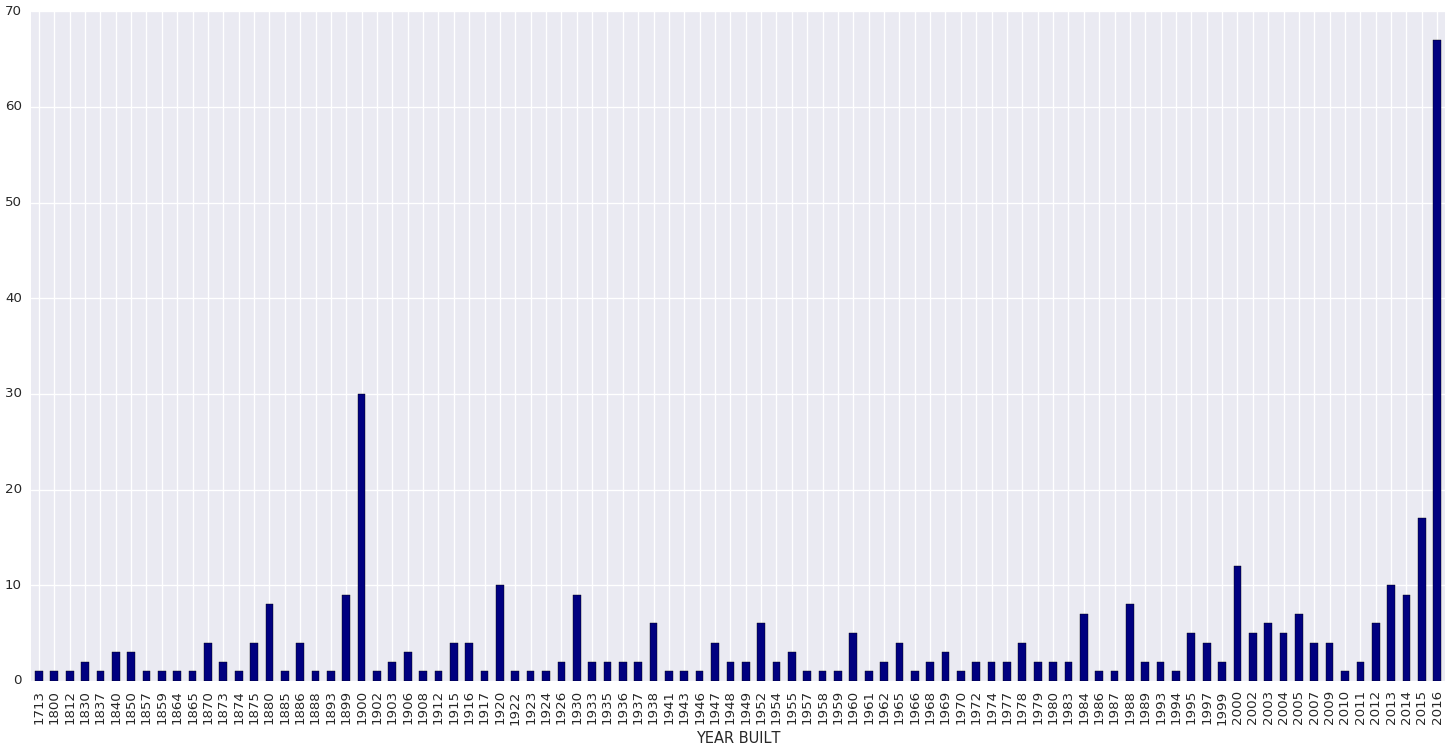

In [6]:
display(os_data)

<div class="alert alert-block alert-info">
For information on how to load data from other sources refer to [these code snippets](https://apsportal.ibm.com/docs/content/analyze-data/python_load.html).
</div>